<a href="https://colab.research.google.com/github/Anjali-A-B/Lung_Cancer_Prediction/blob/main/Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks'

In [ ]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

# load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/survey lung cancer.csv')
print(df)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

In [ ]:
df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
#Check for duplicates in the dataset
int(df.duplicated().sum())

33

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(276, 16)

In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

In [ ]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
# Identify numerical columns (assuming 'AGE' is the only numerical column in the given dataset)
numerical = ['AGE']

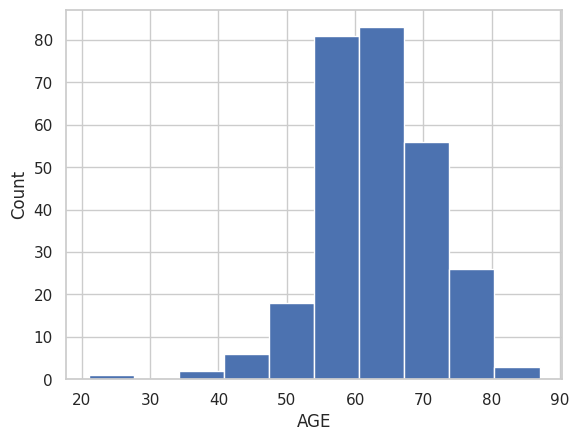

In [ ]:
#look at numerical data distribution
for i in df[numerical].columns:
    plt.hist(df[numerical][i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()


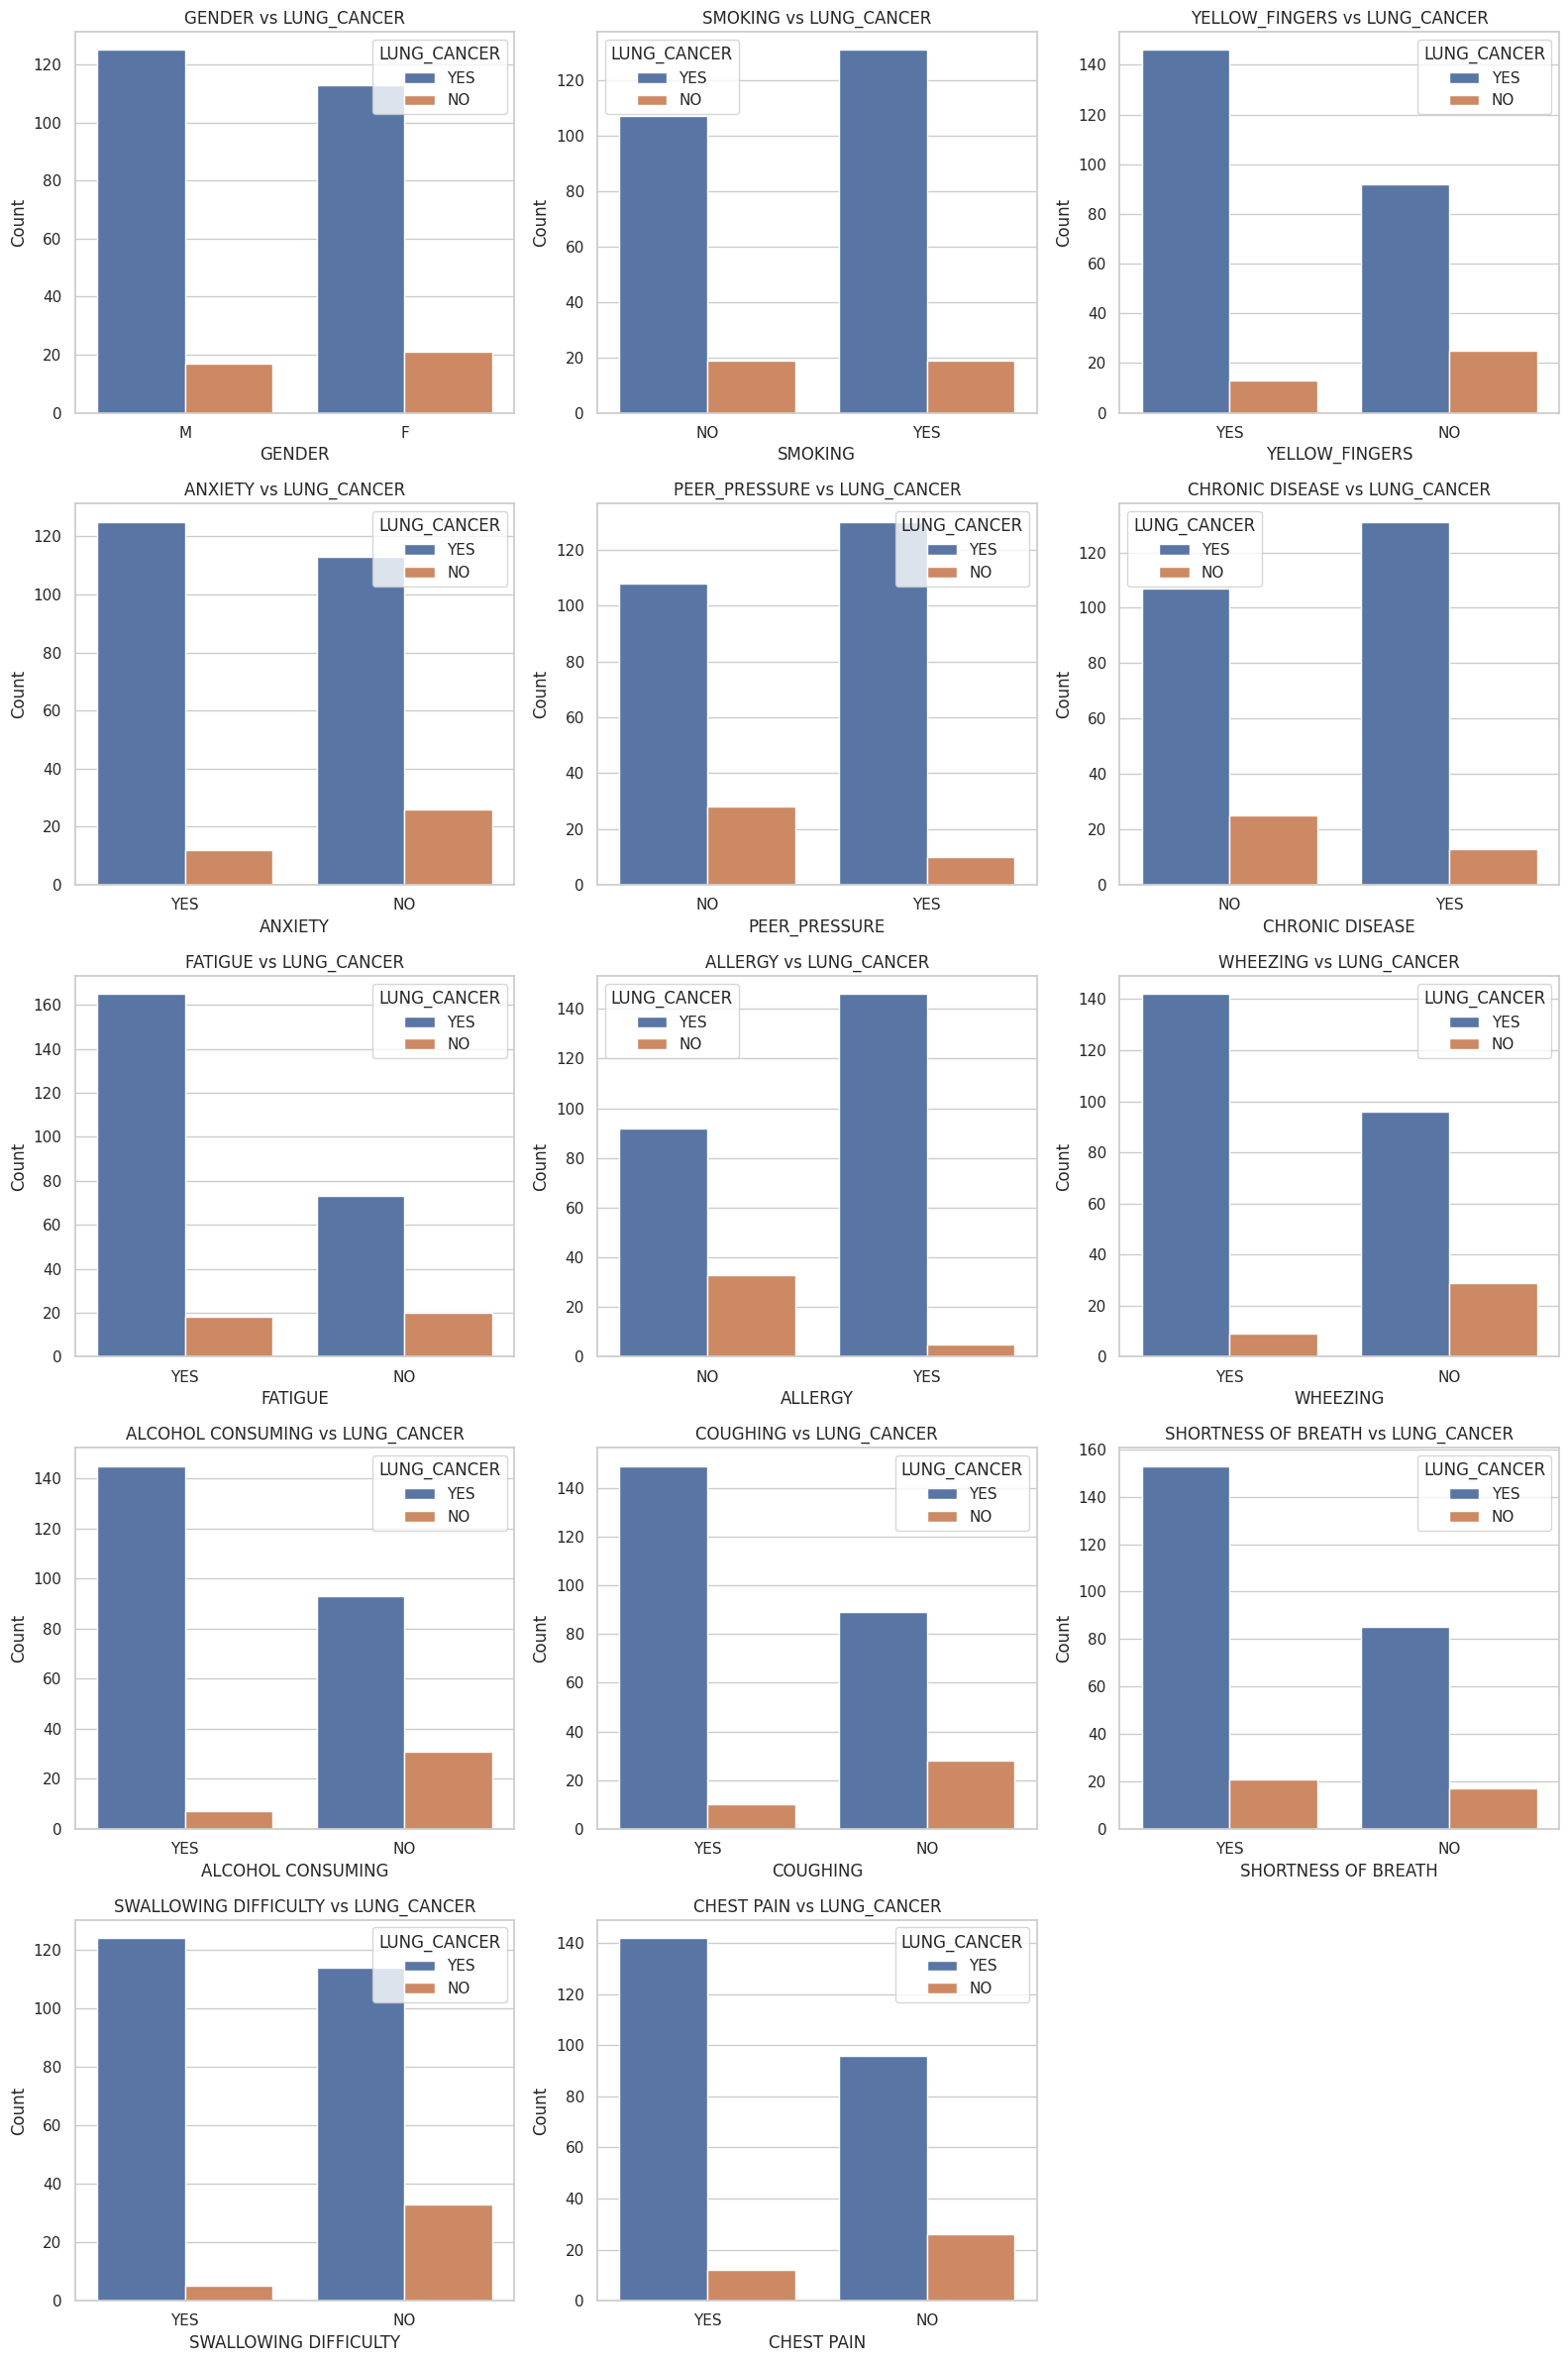

In [ ]:

# Mapping for binary values to 'YES' and 'NO'
binary_mapping = {1: 'NO', 2: 'YES',}

# Apply the mapping to the relevant columns
binary_columns = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                  'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
                  'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                  'SWALLOWING DIFFICULTY', 'CHEST PAIN']

for column in binary_columns:
    df[column] = df[column].map(binary_mapping)

# Set up the plotting configuration
plt.figure(figsize=(16,24))

# List of categorical columns (excluding the target column 'LUNG_CANCER')
categorical_columns = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                       'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
                       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                       'SWALLOWING DIFFICULTY', 'CHEST PAIN']

# Number of rows and columns for the subplots
n_rows = 5
n_cols = 3

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=column, hue='LUNG_CANCER')
    plt.title(f'{column} vs LUNG_CANCER')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
encoder = LabelEncoder()
df['GENDER']=encoder.fit_transform(df['GENDER'])
df['SMOKING']=encoder.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=encoder.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=encoder.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=encoder.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=encoder.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE']=encoder.fit_transform(df['FATIGUE'])
df['ALLERGY']=encoder.fit_transform(df['ALLERGY'])
df['WHEEZING']=encoder.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=encoder.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=encoder.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=encoder.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=encoder.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=encoder.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=encoder.fit_transform(df['LUNG_CANCER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


[link text](https://)(1 : M, 0 : F , 1 : YES, 0 : NO)

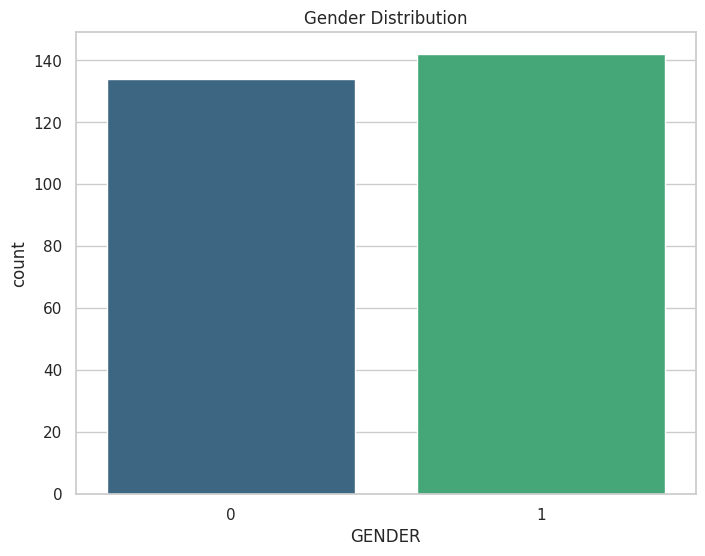

In [ ]:
#Gender Distribution

# Set the style for the plots
sns.set(style="whitegrid")

# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='GENDER',hue='GENDER', palette='viridis', legend=False)
plt.title('Gender Distribution')
plt.show()


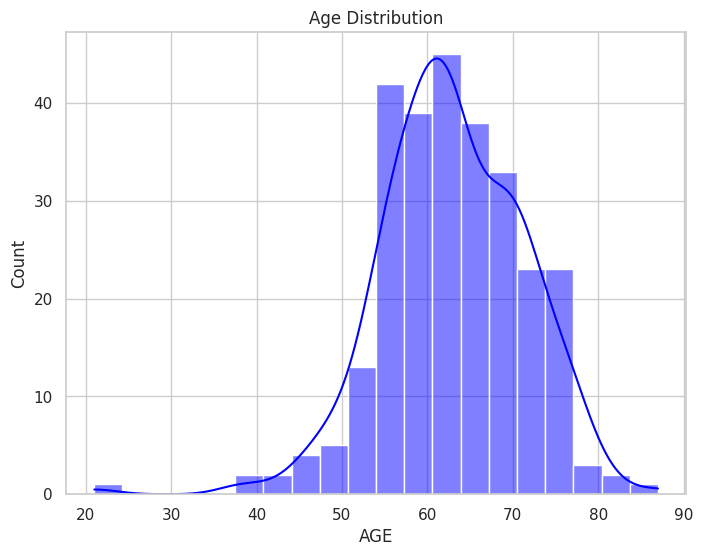

In [ ]:

# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='AGE', kde=True, color='blue')
plt.title('Age Distribution')
plt.show()


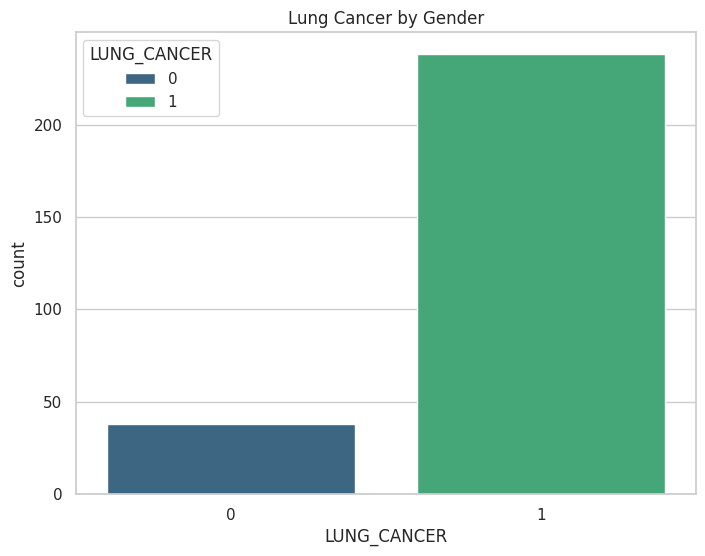

In [ ]:
# Lung Cancer by Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='LUNG_CANCER', hue='LUNG_CANCER', palette='viridis')
plt.title('Lung Cancer by Gender')
plt.show()


<Axes: ylabel='AGE'>

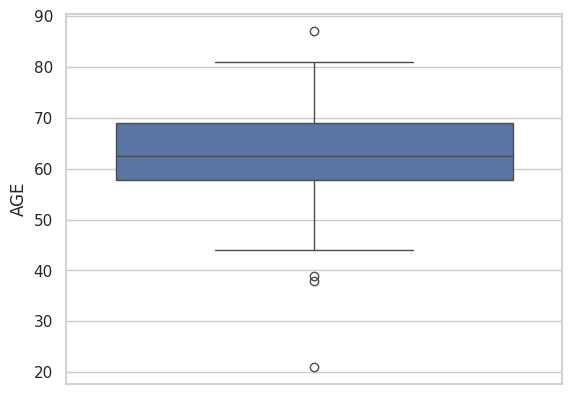

In [ ]:
sns.boxplot(df['AGE'])

In [ ]:
#find the correlation
numerical_df = df.select_dtypes(include=['number'])
correlation = numerical_df.corr()

<Axes: >

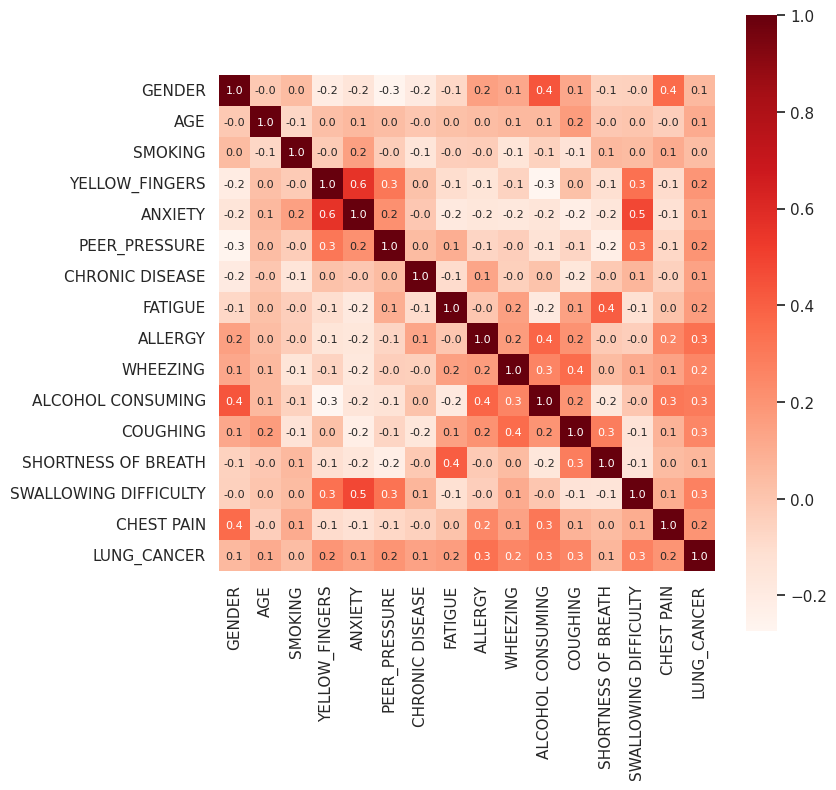

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

In [ ]:
# Features and target variable
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Convert categorical columns to numeric
X = pd.get_dummies(X, drop_first=True)

# Update features_to_scale based on new column names after get_dummies()
features_to_scale = [col for col in X.columns if col.startswith(('SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                     'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
                     'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                     'SWALLOWING DIFFICULTY', 'CHEST PAIN'))]

# Feature scaling
scaler = StandardScaler()
X[features_to_scale] = scaler.fit_transform(X[features_to_scale])


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RandomForest Classifier

In [ ]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Random Forest Classifier

Accuracy: 85.71428571428571
              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.85      1.00      0.92        44

    accuracy                           0.86        56
   macro avg       0.92      0.67      0.71        56
weighted avg       0.88      0.86      0.83        56



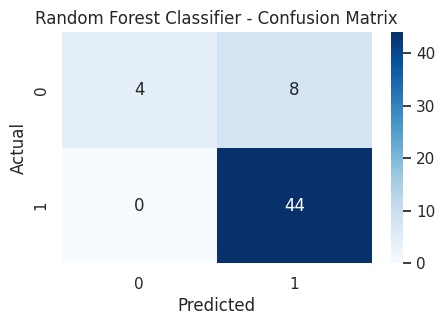

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Random Forest Classifier\n")
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100}')


# Confusion Matrix
confusion_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

K-Nearest Neighbors (KNN)

K-Nearest Neighbors
Accuracy: 0.8214285714285714
              precision    recall  f1-score   support

           0       0.75      0.25      0.38        12
           1       0.83      0.98      0.90        44

    accuracy                           0.82        56
   macro avg       0.79      0.61      0.64        56
weighted avg       0.81      0.82      0.78        56



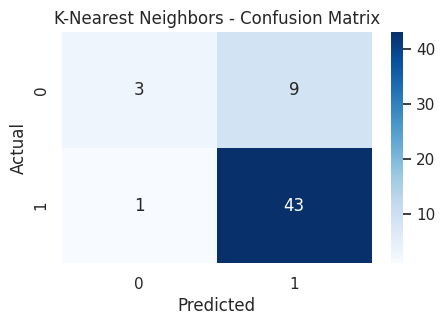

In [ ]:
# Initialize the model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn))
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')

# Confusion Matrix
confusion_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,3))
sns.heatmap(confusion_knn, annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression


Logistic Regression
Accuracy: 0.9285714285714286
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56

Best Parameters for Logistic Regression: {'max_iter': 75, 'C': 1}


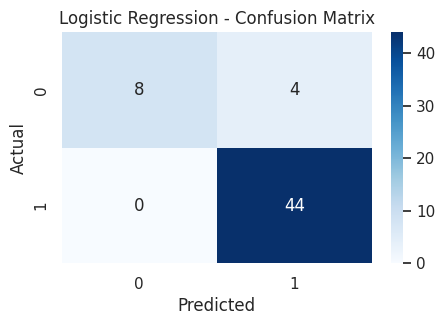

In [ ]:
# Initialize the model
log_model = LogisticRegression()

# Hyperparameter tuning with RandomizedSearchCV
param_grid_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [50, 75, 100, 200, 300, 400, 500, 700]}
random_search_log = RandomizedSearchCV(log_model, param_grid_log, cv=5, random_state=42)
random_search_log.fit(X_train, y_train)

# Predictions
y_pred_log = random_search_log.predict(X_test)

# Evaluation
print("Logistic Regression")
print(classification_report(y_test, y_pred_log))
print(f'Accuracy: {accuracy_score(y_test, y_pred_log)}')

# Confusion Matrix
confusion_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,3))
sns.heatmap(confusion_log, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Building a Predictive Model


In [ ]:
from sklearn.preprocessing import StandardScaler
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
#Building a predictive model
input_data = (0,52,2,1,	1,	1,	1,	2,	1,	2,	2,	2,	2,	1,	2)

import numpy as np
#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are considering less value
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)

print(prediction)

if(prediction[0]==1):
  print('Patient with Lung Cancer')
else:
  print("Patient without Lung Cancer")


[1]
Patient with Lung Cancer
